![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

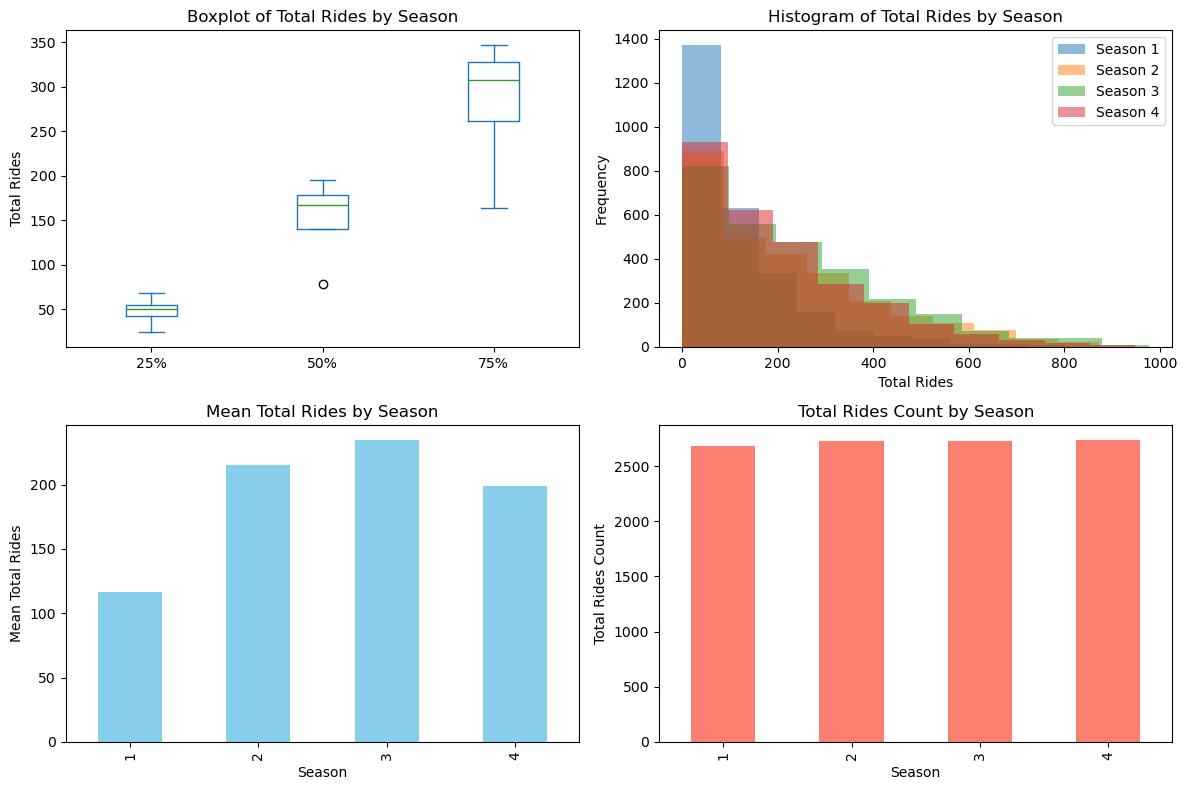

Estasdisticas Descriptivas de la variable Season

         count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0


In [14]:
#Analisis descriptivo de la variable Season
import pandas as pd
import matplotlib.pyplot as plt
summary_season = bikes.groupby('season')['total'].describe()

# Visualización de los datos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# Boxplot
summary_season[['25%', '50%', '75%']].plot(kind='box', ax=axes[0])
axes[0].set_title('Boxplot of Total Rides by Season')
axes[0].set_ylabel('Total Rides')

# Histogram
for i, (season, data) in enumerate(summary_season['mean'].items()):
    bikes[bikes['season'] == season]['total'].plot(kind='hist', alpha=0.5, ax=axes[1], label=f'Season {season}')
axes[1].set_title('Histogram of Total Rides by Season')
axes[1].set_xlabel('Total Rides')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Bar plot of means
summary_season['mean'].plot(kind='bar', ax=axes[2], color='skyblue')
axes[2].set_title('Mean Total Rides by Season')
axes[2].set_xlabel('Season')
axes[2].set_ylabel('Mean Total Rides')

# Bar plot of counts
bikes['season'].value_counts().sort_index().plot(kind='bar', ax=axes[3], color='salmon')
axes[3].set_title('Total Rides Count by Season')
axes[3].set_xlabel('Season')
axes[3].set_ylabel('Total Rides Count')

plt.tight_layout()
plt.show()

print('Estasdisticas Descriptivas de la variable Season\n')
print(summary_season)

## Analisis
* Boxplot: Al observar los Boxplot, se puede notar que hay algunos días en los que la demanda es considerablemente mayor que el promedio. Estos valores atípicos podrían ser el resultado de eventos especiales, condiciones climáticas extremas o cualquier otro factor externo que cause un aumento inusual en la demanda.
* Mean Total Rides by Season: La media de la variable 'Season' aumenta gradualmente desde la estación 1 hasta la estación 3, siendo la estación 3 la media más alta. Sin embargo, la estación 4 muestra una disminución en la media en comparación con la estación 3, aunque sigue siendo más alta que la estación 1.

* Histogram o f Total Rodes by Season: El valor mínimo de paseos totales aumenta de manera considerable a medida que avanzamos de la estación 1 a la estación 3, indicando una mayor demanda mínima en las estaciones de primavera y verano. Sin embargo, la estación 4 muestra un valor mínimo más bajo en comparación con la estación 3.

* Estadisticas descriptivas: Las estaciones 2 y 3 tienen desviaciones estándar más altas, lo que sugiere una mayor variabilidad en la demanda de paseos durante esas estaciones, mientras que las estaciones 1 y 4 muestran desviaciones estándar más bajas, lo que sugiere una demanda más consistente.
Las medianas de las estaciones 2 y 3 son más altas que las de las estaciones 1 y 4, lo que sugiere que la mayoría de los días tienen una demanda más alta durante esas estaciones.
En resumen, la empresa puede esperar una mayor demanda durante las estaciones (estaciones 2 y 3), con la estación 3 mostrando la mayor demanda promedio y variabilidad en la demanda. Sin embargo, también indican que la estación 4, aunque muestra una disminución en comparación con la estación 3, sigue teniendo una demanda significativa en promedio.

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

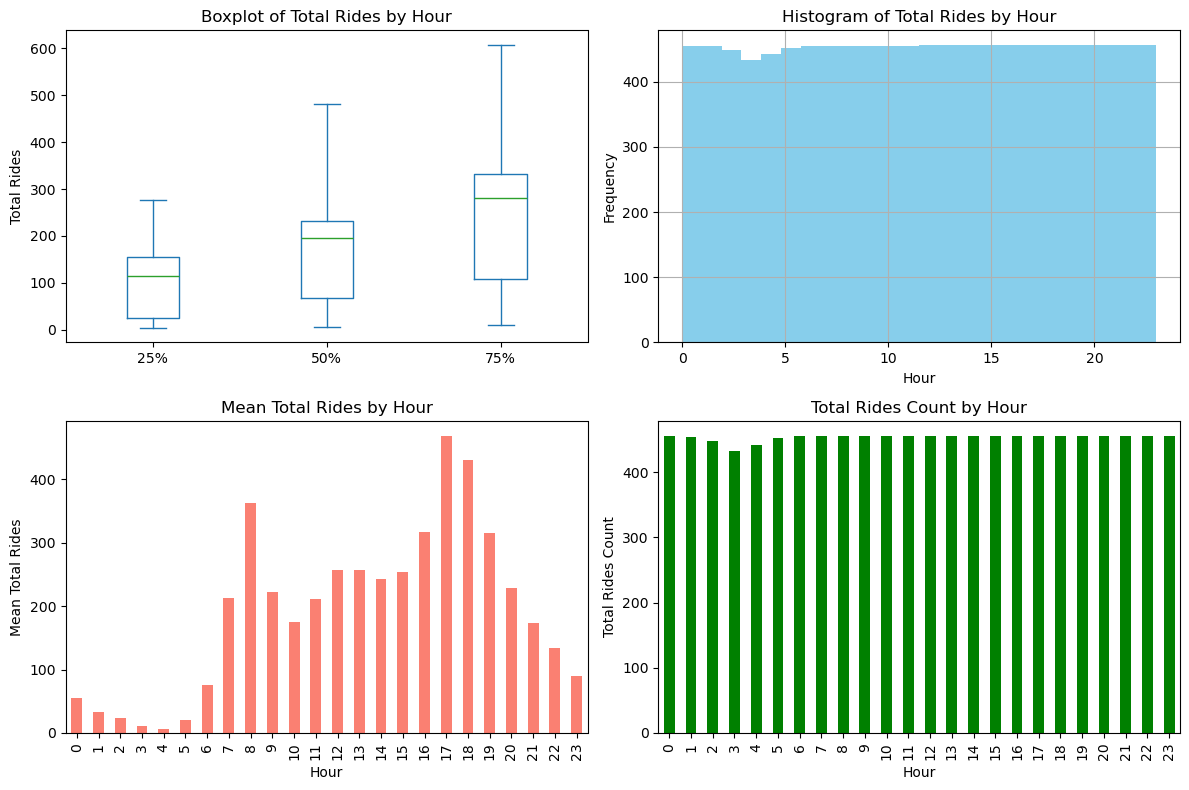

Estadísticas Descriptivas de la variable Hour

      count        mean         std   min     25%    50%     75%    max
hour                                                                   
0     455.0   55.138462   43.620012   2.0   24.00   41.0   74.50  283.0
1     454.0   33.859031   34.112105   1.0   11.00   19.0   46.00  168.0
2     448.0   22.899554   26.110267   1.0    5.00   11.0   32.00  119.0
3     433.0   11.757506   12.666442   1.0    3.00    6.0   15.00   66.0
4     442.0    6.407240    4.217633   1.0    3.00    6.0    9.00   28.0
5     452.0   19.767699   12.784293   1.0    8.00   19.0   29.00   57.0
6     455.0   76.259341   54.745333   1.0   24.50   75.0  118.00  213.0
7     455.0  213.116484  159.207044   1.0   63.00  208.0  334.00  596.0
8     455.0  362.769231  231.723065   8.0  133.50  392.0  563.50  839.0
9     455.0  221.780220   92.099209  14.0  161.00  217.0  294.50  414.0
10    455.0  175.092308  101.807629  17.0  106.00  149.0  218.50  539.0
11    455.0  210.

In [15]:
#Analisis descriptivo de la variable Hour
summary_hour = bikes.groupby('hour')['total'].describe()

# Visualización de los datos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# Boxplot
summary_hour[['25%', '50%', '75%']].plot(kind='box', ax=axes[0])
axes[0].set_title('Boxplot of Total Rides by Hour')
axes[0].set_ylabel('Total Rides')

# Histograma
bikes['hour'].hist(bins=24, ax=axes[1], color='skyblue')
axes[1].set_title('Histogram of Total Rides by Hour')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Frequency')

# Gráfico de barras de medias
summary_hour['mean'].plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Mean Total Rides by Hour')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Mean Total Rides')

# Gráfico de barras de conteos
bikes['hour'].value_counts().sort_index().plot(kind='bar', ax=axes[3], color='green')
axes[3].set_title('Total Rides Count by Hour')
axes[3].set_xlabel('Hour')
axes[3].set_ylabel('Total Rides Count')

plt.tight_layout()
plt.show()

print('Estadísticas Descriptivas de la variable Hour\n')
print(summary_hour)

## Analisis
* Boxplot: Al observar los boxplots, se puede notar que hay algunas horas del día en las que la demanda es considerablemente mayor que el promedio. Estos valores atípicos podrían ser el resultado de eventos especiales, condiciones climáticas extremas o cualquier otro factor externo que cause un aumento inusual en la demanda.

* Mean Total Rides by Hour: La media de la variable 'hour' muestra fluctuaciones a lo largo del día. La demanda tiende a aumentar gradualmente a partir de las primeras horas de la mañana, alcanzando su punto máximo durante las horas pico, generalmente alrededor de las 7-9 y luego nuevamente alrededor de las 17-19 . Estas son las horas en las que las personas suelen viajar hacia y desde el trabajo, lo que resulta en una mayor demanda de paseos.

* Histogram o f Total Rodes by Season: El histograma muestra la distribución de los paseos totales durante cada hora del día. Se observa que las horas pico tienen una frecuencia más alta de paseos totales, lo que coincide con la observación anterior sobre la demanda más alta durante estas horas.

* Estadisticas descriptivas: Las horas pico (generalmente alrededor de las 7-9  y luego nuevamente alrededor de las 17-19) tienden a tener desviaciones estándar más altas, lo que sugiere una mayor variabilidad en la demanda durante estas horas. Las medianas también son más altas durante estas horas, lo que indica que la mayoría de los días tienen una demanda más alta durante esos períodos.

En resumen, el análisis de la variable 'hour' sugiere que la empresa puede esperar una mayor demanda durante las horas pico del día, con una variabilidad significativa en la demanda durante estas horas. Esto puede influir en la planificación de recursos y la asignación de personal para satisfacer la demanda en momentos de mayor necesidad.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

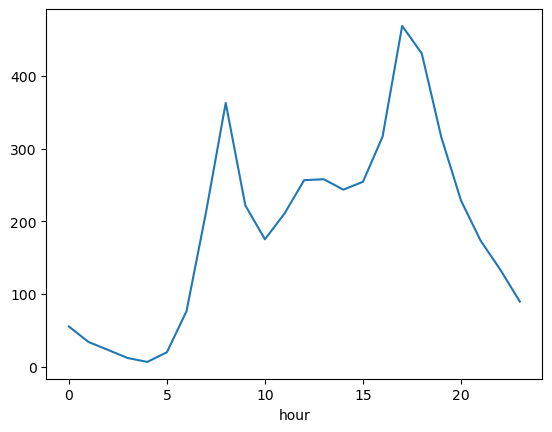

In [16]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

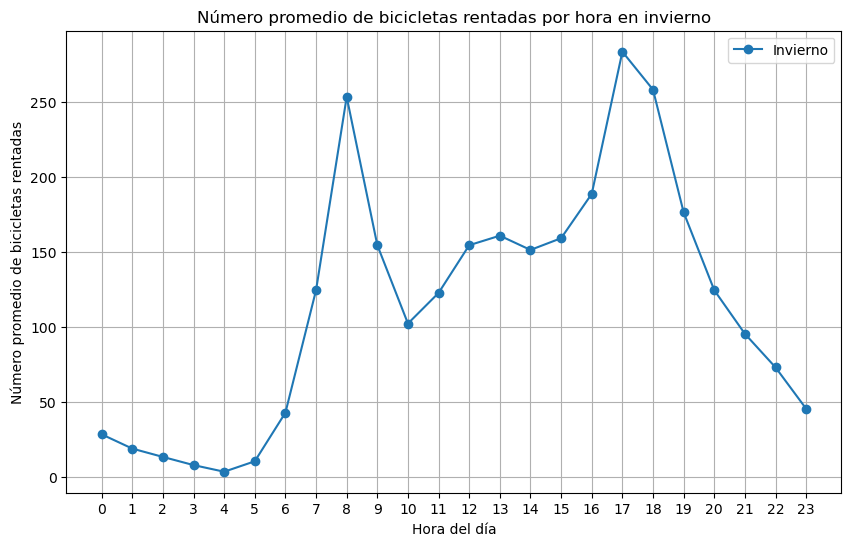

In [18]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
winter = bikes[bikes['season'] == 1]
winter_avg = winter.groupby('hour')['total'].mean()
# Generando la gráfica
plt.figure(figsize=(10, 6))
winter_avg.plot(label='Invierno', marker='o')
plt.xlabel('Hora del día')
plt.ylabel('Número promedio de bicicletas rentadas')
plt.title('Número promedio de bicicletas rentadas por hora en invierno')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

## Analisis:
* La demanda de bicicletas tiende a ser más baja durante las primeras horas de la mañana (horas 3-5) y aumenta gradualmente hacia la mañana.
* Las horas pico de demanda parecen ser alrededor de las 8-9 y luego nuevamente alrededor de las 17-18, lo que sugiere que muchas personas utilizan bicicletas para desplazarse hacia y desde el trabajo durante el invierno.
* Durante las horas pico (alrededor de las 8-9 y 17-18), la demanda varía considerablemente, con un máximo de alrededor de 283 bicicletas rentadas en una hora específica.
* Después de las horas pico de la tarde, la demanda de bicicletas disminuye gradualmente hacia la noche, con el número promedio de bicicletas rentadas cayendo por debajo de 50 en las últimas horas de la noche (horas 20-23).

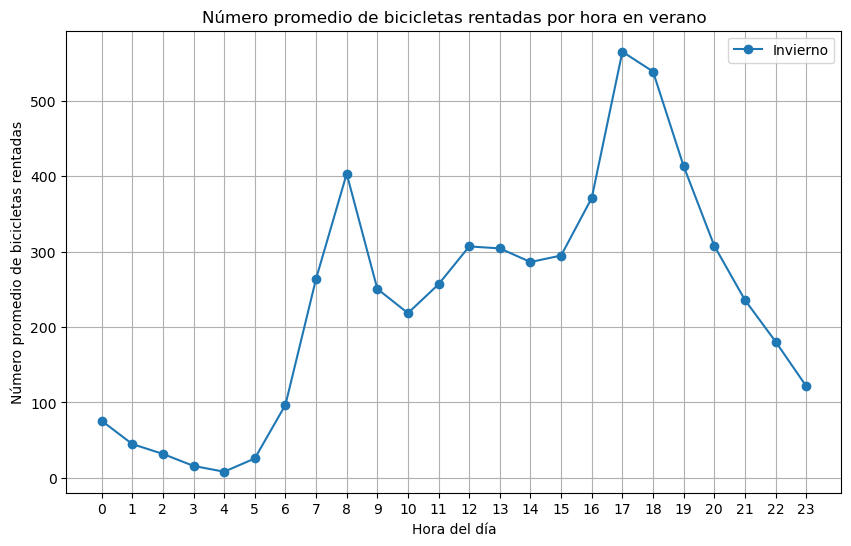

In [19]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
summer= bikes[bikes['season'] == 3]
summer_avg = summer.groupby('hour')['total'].mean()
# Generando la gráfica
plt.figure(figsize=(10, 6))
summer_avg.plot(label='Invierno', marker='o')
plt.xlabel('Hora del día')
plt.ylabel('Número promedio de bicicletas rentadas')
plt.title('Número promedio de bicicletas rentadas por hora en verano')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

## Analisis:
* Se puede observar un patrón claro en el número promedio de bicicletas rentadas por hora durante el verano. Las horas pico son alrededor de las 8-9 y las 17-18,donde la demanda supera considerablemente el promedio durante el día. lo que sugiere que hay una alta demanda de bicicletas durante las horas de la mañana y la tarde, posiblemente debido a las horas de trabajo y las actividades recreativas después del trabajo.
* Duurante las primeras horas de la mañana y las últimas horas de la noche, la demanda de bicicletas es considerablemente menor, lo que indica que hay menos actividades que requieren el uso de bicicletas durante estas horas, posiblemente debido al descanso y el sueño de las personas.
* Las horas entre la medianoche y las primeras horas de la mañana, así como las horas tardías de la noche, muestran una menor demanda de bicicletas en promedio, lo que indica que hay menos actividades o menos necesidad de usar bicicletas durante estos períodos.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [26]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  total       10886 non-null  int64  
 11  hour        10886 non-null  int32  
dtypes: float64(3), int32(1), int64(8)
memory usage: 1.0 MB


In [27]:
# Celda 3
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Convertir la variable 'season' en una variable categórica
bikes['season'] = bikes['season'].astype('category')

# Seleccionar las variables predictoras y la variable de respuesta
X = pd.get_dummies(bikes[['season', 'hour']], drop_first=True)
y = bikes['total']
y = bikes['total']

# Ajustando el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Obtener los coeficientes
coefficients = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_})
intercept = model.intercept_

print("Coeficientes:")
print(coefficients)
print("\nIntercepto:", intercept)

Coeficientes:
   Variable  Coeficiente
0      hour    10.545206
1  season_2   100.317232
2  season_3   119.467550
3  season_4    84.083118

Intercepto: -6.430262462306132


## Interpretación de los coeficientes:

* Para la variable 'hour': El coeficiente de 10.545206 sugiere que, manteniendo todas las demás variables constantes, se espera un aumento de aproximadamente 10.5 bicicletas en el número total rentado por cada hora adicional del día. Esto indica que hay una relación positiva entre la hora del día y el número total de bicicletas rentadas.
* Para las variables categóricas 'season_2', 'season_3' y 'season_4': Los coeficientes positivos (100.317232, 119.467550 y 84.083118 respectivamente) indican que, en comparación con la primera estación (season 1), se espera que las estaciones 2, 3 y 4 tengan un mayor número promedio de bicicletas rentadas. Por ejemplo, para la estación 3, se espera que el número promedio de bicicletas rentadas sea aproximadamente 119.5 bicicletas más alto que en la estación 1, manteniendo todas las demás variables constantes.

## ¿Cuáles son las limitaciones de la regresión lineal en este caso?

Una de las principales limitaciones de la regresión lineal en este caso es que asume una relación lineal entre las variables predictoras y la variable de respuesta. Sin embargo, la relación entre la hora del día y el número de bicicletas rentadas puede no ser estrictamente lineal, especialmente si hay efectos no lineales como picos en la demanda durante ciertas horas del día.
Además, la regresión lineal no puede capturar interacciones complejas entre las variables predictoras, como la interacción entre la hora del día y la estación del año. También puede no ser capaz de modelar adecuadamente patrones estacionales o tendencias a largo plazo en los datos.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [31]:
# Celda 4
#Vamos a utilizar la informacion obtenido en  summer_hourly_avg y winter_hourly_avg, para establecer reglas basadas 
#en los valores medios de bicicletas rentadas por hora en verano("season"=1) y en invierno("season"=3):
#    Si season=1:
#        - Si hour es:
#            - Entre las 7  y  8: Pronosticar 264 bicicletas rentadas
#            - Entre las 8  y 9: Pronosticar 403 bicicletas rentadas
#            - Entre las 9 y 10 : Pronosticar 250 bicicletas rentadas
#            - Entre las 17  y 18: Pronosticar 565 bicicletas rentadas

#    Si season=3:
#        - Si hour es:
#            - Entre las 7 y  8 : Pronosticar 124 bicicletas rentadas
#            - Entre las 8 y 9: Pronosticar 253 bicicletas rentadas
#            - Entre las 17 y 18 : Pronosticar 283 bicicletas rentadas
def predict_total(hour, season):
    if season == 1:
        if 7 <= hour < 8:
            return 264
        elif 8 <= hour < 9:
            return 403
        elif 9 <= hour < 10:
            return 250
        elif 17 <= hour < 18:
            return 565
    elif season == 3:
        if 7 <= hour < 8:
            return 124
        elif 8 <= hour < 9:
            return 253
        elif 17 <= hour < 18:
            return 283
        
# Ejemplo de uso
hour = 8
season = 1
print(f"Pronóstico para la hora {hour} y la estación {season}: {predict_total(hour, season)} bicicletas rentadas")

Pronóstico para la hora 8 y la estación 1: 403 bicicletas rentadas


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [33]:
# Celda 5
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Convertir la variable 'season' en una variable categórica
bikes['season'] = bikes['season'].astype('category')

# Seleccionar las variables predictoras y la variable de respuesta
X = pd.get_dummies(bikes[['season', 'hour']], drop_first=True)
y = bikes['total']

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un árbol de decisiones
tree_model = DecisionTreeRegressor(max_depth=6, random_state=42)
tree_model.fit(X_train, y_train)

# Predicción en conjunto de validación
y_pred_tree = tree_model.predict(X_val)

# Evaluación del rendimiento del árbol de decisiones
tree_rmse = mean_squared_error(y_val, y_pred_tree, squared=False)
print("RMSE del árbol de decisiones:", tree_rmse)

#Realizando prediccion del modelo lineal
y_pred_lineal = model.predict(X_val)
linear_rmse = mean_squared_error(y_val, y_pred_lineal, squared=False)
print("RMSE del modelo de regresión lineal:", linear_rmse)

RMSE del árbol de decisiones: 123.39285367118077
RMSE del modelo de regresión lineal: 159.33010242849136


## Analisis
El RMSE del árbol de decisiones (123.39) es menor que el del modelo de regresión lineal (159.33), lo que indica que el árbol de decisiones tiene un mejor rendimiento en este conjunto de datos en particular.La diferencia en los RMSE puede sugerir que el árbol de decisiones se ajusta mejor a la relación entre las variables predictoras y la variable de respuesta en comparación con el modelo de regresión lineal. Esto puede deberse a la naturaleza no lineal de los datos, que un árbol de decisiones puede capturar mejor que un modelo lineal.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [34]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [35]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [36]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [43]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

# Escalar los datos (solo para la regresión logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Regresion Logistica
logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(X_train_scaled, y_train)
##Prediciendo
y_pred_logisticpunto6 = logistic_model.predict(X_test_scaled)
## Calculando las métricas de desempeño
accuracy_logistic = accuracy_score(y_test, y_pred_logisticpunto6)
f1_logistic = f1_score(y_test, y_pred_logisticpunto6)
print("\nDesempeño de la regresión logística:")
print("Accuracy:", accuracy_logistic)
print("F1-Score:", f1_logistic)
print('\n')

#Arbol de decisión
# Definiendo los parámetros a calibrar para el árbol de decisión
param_grid = {
    'max_depth': [3, 5, 7, 10]  # Probar diferentes profundidades máximas
}
tree_model = DecisionTreeClassifier(random_state=1)
# Realizar búsqueda de la mejor combinación de parámetros usando GridSearchCV
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Obtener la mejor combinación de parámetros
best_params = grid_search.best_params_
# Entrenar el árbol de decisión con los mejores parámetros
best_tree_model = DecisionTreeClassifier(**best_params, random_state=1)
best_tree_model.fit(X_train, y_train)
# Predeciendo
y_pred_arbol = best_tree_model.predict(X_test)
# Calcular las métricas de desempeño
accuracy_tree = accuracy_score(y_test, y_pred_arbol)
f1_tree = f1_score(y_test, y_pred_arbol)
print("Desempeño del árbol de decisión:")
print("Accuracy:", accuracy_tree)
print("F1-Score:", f1_tree)
print("Mejores parámetros del árbol de decisión:", best_params)


Desempeño de la regresión logística:
Accuracy: 0.64
F1-Score: 0.6296296296296297


Desempeño del árbol de decisión:
Accuracy: 0.6413333333333333
F1-Score: 0.6072992700729928
Mejores parámetros del árbol de decisión: {'max_depth': 3}


## Analisis:
Ambos modelos muestran un rendimiento similar en términos de accuracy, con aproximadamente un 64%.
La regresión logística tiene un F1-Score ligeramente mayor que el árbol de decisión, indicando un mejor equilibrio entre precisión y recall.
El árbol de decisión con profundidad máxima de 3 fue seleccionado como el mejor modelo, lo que sugiere que un modelo más simple puede ser suficiente para este problema y ayuda a evitar el sobreajuste.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [45]:
# Celda 7
from sklearn.ensemble import BaggingClassifier

# Definir los modelos base
tree_model_depth = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model_leaf = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
logistic_model = LogisticRegression(random_state=42)

# Crear los conjuntos de modelos
models = [
    ('tree_depth', tree_model_depth, 100),
    ('tree_leaf', tree_model_leaf, 100),
    ('logistic', logistic_model, 100)]

# Entrenar y evaluar cada modelo de manera independiente
for name, model, n_estimators in models:
    print(f"Entrenando y evaluando {name}...")
    clf = BaggingClassifier(base_estimator=model, n_estimators=n_estimators, bootstrap=True,
                            random_state=42, n_jobs=-1, oob_score=True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  F1-Score: {f1}")

# Entrenar y evaluar el ensamble de modelos
print("Entrenando y evaluando el ensemble de modelos...")
ensemble_clf = BaggingClassifier(base_estimator=None, n_estimators=300, bootstrap=True,
                                 random_state=42, n_jobs=-1, oob_score=True)
ensemble_clf.fit(X_train, y_train)
y_pred_ensemble = ensemble_clf.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
print("Ensamble de modelos:")
print(f"  Accuracy: {accuracy_ensemble}")
print(f"  F1-Score: {f1_ensemble}")

Entrenando y evaluando tree_depth...
tree_depth:
  Accuracy: 0.6573333333333333
  F1-Score: 0.6573333333333333
Entrenando y evaluando tree_leaf...
tree_leaf:
  Accuracy: 0.6553333333333333
  F1-Score: 0.6582947785855915
Entrenando y evaluando logistic...
logistic:
  Accuracy: 0.618
  F1-Score: 0.613099257258609
Entrenando y evaluando el ensemble de modelos...
Ensemble de modelos:
  Accuracy: 0.646
  F1-Score: 0.6495049504950494


## Analisis:
Todos los modelos de arboles tienen métricas de rendimiento similares, mientras que la regresión logística tiene un rendimiento ligeramente inferior. Sin embargo, el ensamble de modelos tiene un rendimiento comparable al de los árboles de decisión individuales, lo que sugiere que la combinación de diferentes tipos de modelos puede mejorar ligeramente el rendimiento en este caso específico.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [50]:
# Celda 8
# Definiendo los modelos base
tree_model_depth = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model_leaf = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
logistic_model = LogisticRegression(random_state=42)

# Creando los conjuntos de modelos
models = [
    ('tree_depth', tree_model_depth, 100),
    ('tree_leaf', tree_model_leaf, 100),
    ('logistic', logistic_model, 100)]

# Entrenando y evaluando cada modelo de manera independiente, usando valoracion ponderada
for name, model, n_estimators in models:
    print(f"Entrenando y evaluando {name}...")
    bagged_models = []
    errors = np.zeros(n_estimators)
    for _ in range(n_estimators):
        bagged_model = BaggingClassifier(base_estimator=model, n_estimators=1, bootstrap=True,
                                         random_state=42, oob_score=True)
        bagged_model.fit(X_train, y_train)
        oob_mask = np.array([True if idx not in bagged_model.estimators_samples_[0] else False for idx in range(len(X_train))])
        y_pred = bagged_model.predict(X_train[oob_mask])
        errors[_] = 1 - accuracy_score(y_train[oob_mask], y_pred)
        bagged_models.append(bagged_model)
    alpha = (1 - errors) / (1 - errors).sum()
    weighted_sum = np.zeros(len(X_test))
    for i in range(n_estimators):
        y_pred = bagged_models[i].predict(X_test)
        weighted_sum += y_pred * alpha[i]
    y_pred_weighted = (weighted_sum >= 0.5).astype(int)
    accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
    f1_weighted = f1_score(y_test, y_pred_weighted)
    print(f"{name}:")
    print(f"  Accuracy: {accuracy_weighted}")
    print(f"  F1-Score: {f1_weighted}")

Entrenando y evaluando tree_depth...
tree_depth:
  Accuracy: 0.6186666666666667
  F1-Score: 0.6119402985074627
Entrenando y evaluando tree_leaf...
tree_leaf:
  Accuracy: 0.5806666666666667
  F1-Score: 0.5820598006644518
Entrenando y evaluando logistic...
logistic:
  Accuracy: 0.5946666666666667
  F1-Score: 0.6097560975609756


## Analisis:
* Para el modelo de árbol de decisión con profundidad máxima especificada, obtenemos una precisión de aproximadamente 0.619 y un F1-Score de aproximadamente 0.612.
* Para el modelo de árbol de decisión con mínimo de muestras en las hojas especificado, obtenemos una precisión de alrededor de 0.581 y un  F1-Score de alrededor de 0.582.
* Para el modelo de regresión logística, obtenemos una precisión de aproximadamente 0.595 y un F1-Score de aproximadamente 0.610.
En comparación, el árbol de decisión con profundidad máxima parece tener el mejor rendimiento en términos de precisión y F1-Score.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

## Comparacion de los puntos 7 Y 8
### Votacion mayoritaria:
* Para el modelo de árbol de decisión con profundidad máxima, se obtuvo una precisión de y un F1-Score de aproximadamente 0.657.
* Para el modelo de árbol de decisión con mínimo de muestras en las hojas, se obtuvo una precisión de alrededor de 0.655 y un F1-Score de alrededor de 0.658.
* Para el modelo de regresión logística, se obtuvo una precisión de aproximadamente 0.618 y un F1-Score de aproximadamente 0.613.
* Para el ensemble de modelos, se obtuvo una precisión de aproximadamente 0.646 y un F1-Score de aproximadamente 0.650.

**Ventajas:** 
* No requiere calcular pesos para cada modelo.
* Mayor flexibilidad para combinar diferentes modelos.

**Desventajas:**
* Puede dar más peso a modelos menos precisos.
* Puede no ser óptimo si los modelos individuales tienen pesos muy diferentes.

### Votacion Ponderada:
* Para el modelo de árbol de decisión con profundidad máxima, se obtuvo una precisión y un F1-Score de aproximadamente 0.619 y 0.612, respectivamente.
* Para el modelo de árbol de decisión con mínimo de muestras en las hojas, se obtuvo una precisión de alrededor de 0.581 y un F1-Score de alrededor de 0.582.
* Para el modelo de regresión logística, se obtuvo una precisión de aproximadamente 0.595 y un F1-Score de aproximadamente 0.610.

**Ventajas:**
* Permite dar más peso a modelos más precisos.
* Puede manejar eficazmente modelos con diferentes niveles de precisión.
* Proporciona un mecanismo para ajustar la importancia de cada modelo.

**Desventajas:**
* Requiere calcular pesos para cada modelo, lo que puede ser complejo.
* Puede ser sensible a errores en la estimación de los pesos.
* Puede ser menos efectivo si los modelos individuales tienen pesos similares.

En conclusion La votación mayoritaria produjo un F1-Score más alto para el ensemble de modelos (aproximadamente 0.650) en comparación con la votación ponderada (alrededor de 0.612).Además, la precisión del ensemble de modelos fue ligeramente mayor en la votación mayoritaria (aproximadamente 0.646) en comparación con la votación ponderada (aproximadamente 0.619).
